<a href="https://colab.research.google.com/github/uzeziogho/Private-Projects/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context:**
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.


**Content:**
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
maths_perf=pd.read_csv('/content/student-mat.csv')
port_perf=pd.read_csv('/content/student-por.csv')
maths_perf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Define pass/fail based on final grade G3
maths_perf['pass'] = maths_perf['G3'] >= 10  # True if G3 >= 10, else False

# Drop G1, G2, G3 to prevent leakage
maths_perf.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

KeyError: 'G3'

In [ ]:
print(maths_perf.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'pass'],
      dtype='object')


In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(maths_perf, drop_first=True)

In [ ]:
from math import log
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Scale features for models that need it (logistic regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Initialize models ---
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
xgb_model = XGBClassifier(scale_pos_weight=1, eval_metric='logloss', random_state=42)
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
RFM = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

# --- Models list ---
models = [
    ('Logistic Regression', log_reg, X_train_scaled, X_test_scaled),
    ('XGBoost', xgb_model, X_train_scaled, X_test_scaled),  # Replacing SVM
    ('Decision Tree', tree_model, X_train, X_test),          # Trees don't need scaling
    ('Random Forest', RFM, X_train, X_test)
]

# --- Train and evaluate ---
for name, model, X_tr, X_te in models:
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



--- Logistic Regression ---
Accuracy: 0.7070707070707071
              precision    recall  f1-score   support

       False       0.60      0.58      0.59        36
        True       0.77      0.78      0.77        63

    accuracy                           0.71        99
   macro avg       0.68      0.68      0.68        99
weighted avg       0.71      0.71      0.71        99

--- XGBoost ---
Accuracy: 0.6565656565656566
              precision    recall  f1-score   support

       False       0.55      0.31      0.39        36
        True       0.68      0.86      0.76        63

    accuracy                           0.66        99
   macro avg       0.62      0.58      0.58        99
weighted avg       0.63      0.66      0.63        99

--- Decision Tree ---
Accuracy: 0.696969696969697
              precision    recall  f1-score   support

       False       0.62      0.42      0.50        36
        True       0.72      0.86      0.78        63

    accuracy                  

Silhouette Score: 0.077
Davies-Bouldin Index: 2.785


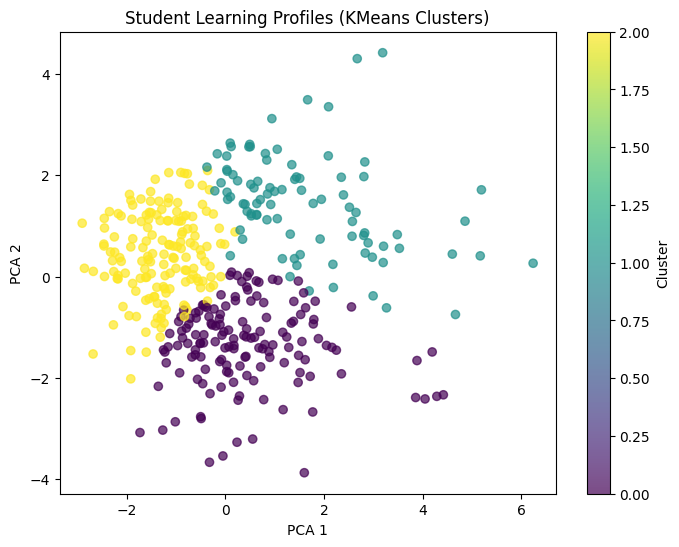

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1. Prepare features (drop grades + pass) ---
features = maths_perf.drop(['G1', 'G2', 'G3', 'pass'], axis=1, errors='ignore')

# Separate numerical and categorical columns
num_cols = features.select_dtypes(include=['int64', 'float64']).columns
cat_cols = features.select_dtypes(include=['object', 'bool', 'category']).columns

# --- 2. Preprocessing: scale numeric + one-hot encode categorical ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

# --- 3. Clustering with KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)  # try 3 clusters first
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', kmeans)])

# Fit and predict cluster labels
labels = pipeline.fit_predict(features)

# Add cluster labels back to dataset
features_clustered = features.copy()
features_clustered['Cluster'] = labels

# --- 4. Evaluation metrics ---
silhouette = silhouette_score(
    pipeline.named_steps['preprocessor'].transform(features), labels
)
db_index = davies_bouldin_score(
    pipeline.named_steps['preprocessor'].transform(features), labels
)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")

# --- 5. Visualization with PCA (2D) ---
X_pca = PCA(n_components=2).fit_transform(
    pipeline.named_steps['preprocessor'].transform(features)
)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', alpha=0.7)
plt.title("Student Learning Profiles (KMeans Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()



In [ ]:
# --- Summarize clusters ---
cluster_summary = features_clustered.groupby('Cluster').mean(numeric_only=True)
print("Cluster Profiles (average values):")
print(cluster_summary)

# --- For categorical features, check proportions ---
cat_summary = features_clustered.groupby('Cluster')[cat_cols].agg(lambda x: x.value_counts(normalize=True).head(1))
print("\nCluster Profiles (dominant categorical features):")
print(cat_summary)


Cluster Profiles (average values):
               age      Medu      Fedu  ...      Walc    health  absences
Cluster                                 ...                              
0        17.068027  1.761905  1.632653  ...  2.088435  3.551020  5.285714
1        16.900000  3.244444  2.911111  ...  3.877778  3.677778  9.300000
2        16.234177  3.386076  3.126582  ...  1.575949  3.487342  4.056962

[3 rows x 13 columns]

Cluster Profiles (dominant categorical features):
           school       sex   address  ...    higher  internet  romantic
Cluster                                ...                              
0        0.823129  0.619048  0.687075  ...  0.904762  0.741497  0.639456
1        0.855556  0.688889  0.766667  ...  0.944444  0.911111  0.655556
2        0.955696  0.563291  0.867089  ...  0.993671  0.873418  0.696203

[3 rows x 17 columns]


# 🎓 Student Learning Profiles – Cluster Analysis Report

We used **unsupervised clustering** (K-Means, 3 clusters) on student behavioural and socio-demographic data (excluding grades to avoid leakage). This revealed **three distinct learning profiles**, which can inform targeted support strategies.

---

## 📊 Cluster Profiles

| Cluster | Key Characteristics (Numeric Averages)                               | Dominant Categorical Features                                      | Learning Profile                                                            | Suggested Support                                                                                                |
| ------- | -------------------------------------------------------------------- | ------------------------------------------------------------------ | --------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **0**   | Age ~17.1, Medu ~1.8, Fedu ~1.6, Absences ~5.3, Weekend alcohol ~2.1 | Mostly female, urban, in relationships, internet access good       | **Older, modest parental education, moderate absences & alcohol**           | - Mentoring & career guidance<br>- Study groups for academic reinforcement<br>- Time management workshops        |
| **1**   | Age ~16.9, Medu ~3.2, Fedu ~2.9, Absences ~9.3, Weekend alcohol ~3.9 | Mostly male, urban, high internet use, aiming for higher education | **Higher parental education, but high absences & alcohol use**              | - Attendance monitoring<br>- Counselling on lifestyle balance<br>- Use digital platforms for structured learning |
| **2**   | Age ~16.2, Medu ~3.4, Fedu ~3.1, Absences ~4.1, Weekend alcohol ~1.6 | Mostly female, urban, high aspirations, strong internet access     | **Highly engaged learners, strong parental education, low risk behaviours** | - Enrichment programs<br>- Peer mentoring opportunities<br>- Recognition & motivation strategies                 |

---

## 🔑 Key Insights

1. **Cluster 0 learners** are supported but from modest educational backgrounds. They may benefit most from **structured academic guidance** and motivation.
2. **Cluster 1 learners** are academically capable but **at risk due to disengagement (absences, alcohol use)**. Early **intervention and monitoring** are crucial.
3. **Cluster 2 learners** are **strongly positioned for success** and can be empowered as **peer leaders** while benefiting from enrichment.

---

## 🎯 Recommendations for Student Support

* **Targeted Mentorship:** Assign Cluster 0 and 1 students to Cluster 2 peers for study groups.
* **Attendance Intervention:** Focus efforts on Cluster 1 with proactive outreach.
* **Parental Engagement:** Share insights with families to align support at home.
* **Wellbeing Programs:** Alcohol awareness and healthy lifestyle workshops tailored for Cluster 1.

---
